In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn import datasets, model_selection

#### 2 moons dataset

In [9]:
size = 1000
X_moons, y_moons = datasets.make_moons(size, noise=0.05, random_state=42)
X = X_moons[:,0]
Y = X_moons[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X_moons, y_moons, test_size=0.2)

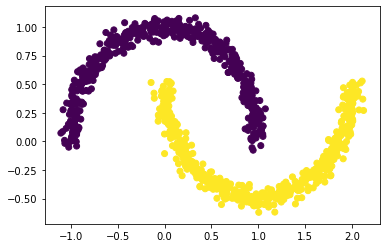

In [38]:
plt.scatter(X, Y, c=y_moons)
plt.show()

## AdaBoost w SVC vs. w DT
- 생성, 학습, 예측

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [32]:
ada_svc_clf = AdaBoostClassifier(
    SVC(probability=True,kernel='linear'),
    n_estimators=200,
    learning_rate=0.5, algorithm='SAMME')
ada_svc_clf.fit(X_train, Y_train)
ada_SVC_pred = ada_svc_clf.predict(X_test)

In [36]:
print("AdaBoost w SVC:", accuracy_score(ada_SVC_pred, Y_test))

AdaBoost w SVC: 0.815


In [40]:
ada_dt_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), 
    n_estimators=200, 
    algorithm="SAMME.R", learning_rate=0.5)
ada_dt_clf.fit(X_train, Y_train)
ada_DT_pred = ada_dt_clf.predict(X_test)

In [41]:
print("AdaBoost w DT:", accuracy_score(ada_DT_pred, Y_test))

AdaBoost w DT: 0.99


## Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [55]:
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=120)
gbrt.fit(X_train, Y_train)
gb_pred = gbrt.predict(X_test)
print(accuracy_score(gb_pred, Y_test))

0.99


<br>

***

#### Reference
[후니의 컴퓨터](https://hoony-gunputer.tistory.com/144?category=742600)